# INFO 2950 Fall 2022 Homework 2

## Discussion

We described some connections between variables in class. Now think about pairs of variables that you might like to compare. For each pair, discuss:

Number of students majoring in the Cornell English Department and Number of annual murders in Tompkins County

* How much variation do you expect to see in each variable individually?

I expect to see some variation in the year to year cornell english majors and also in the number of annual murders, probably within 1-10 variation in English majoring people and murdered people. 

* What relationship would you expect to observe between the two variables? Why?

I would not expect to see any relationship between the two variables unless people who major in english are predisposed to being commiting murder, or are somehow more murderable. These two variables seem to have nothing in common so no relationship is expected. 


* For each variable, how would that variable be recorded? 
    Who is monitoring it, and how are they making that information available? 
    Do you trust that process? 
    Why or why not?

It is being respectively recorded in terms of discrete value by Cornell University and the Ithaca/Tompkins County police department, and monitored by both. It's probably publicly available but I would need to look into it. Yes I trust this process because both monitoring parties have an interest in getting the information correct. 


* Would you expect both variables to be provided by the same source? If not, how would you combine them? For example, what variable might link pairs of values between the two variables?

I would probably do some type of JOIN function using SQL on the year, since this is commonality between the two variables. 

## Coding

You will turn in this notebook without any of the data files. We will not run your code, all cells must be executed and the notebook saved with output included.

The goal of this homework is to consider correlations in the context of real-world data. You will practice working with data files that can be inconsistent, incomplete, and subject to sampling biases.

Based on the experience you have from the `numpy` and `pandas` skill drills, you will apply those skills to manipulating columns and rows of a data file of COVID case numbers from Tompkins County, NY (ie Ithaca and surrounding areas). We will ask you to do the same thing in both `pandas` and `SQL` syntax.

The data file is a snapshot of the [Tompkins County Heath Department's daily COVID case information spreadsheet](https://docs.google.com/spreadsheets/d/e/2PACX-1vQvvugFsb4GePXQnmEZbgrtqmJRiaA7tO1UGSBwvBdhbJEmf2ntzE0am-x-Lo6mLPj9ASLpAg6UZsCF/pubhtml?gid=1214476126&single=true). The local health department has updated this daily for 2.5 years.

Part of this homework will involve practicing how to use online resources. *Nobody* remembers everything. There is no level of experience that will allow you to never use documentation and question-answer forums. The key is to use these in ways that help you grow your skills, not in ways that prevent you from growing. They also provide an opportunity to express gratitude for people who helped you.

In [1]:
import numpy as np
import pandas as pd

import seaborn
from matplotlib import pyplot as plt

import duckdb, sqlalchemy

/Applications/anaconda3/envs/info2950/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
%load_ext sql

%config SqlMagic.autopandas = True
%config SqlMagic.feedback = False
%config SqlMagic.displaycon = False

%sql duckdb:///:memory:

---

## Problem 1 (5 pts)
Do not move or modify this cell, we use it for automated homework analysis. 

You will update this problem over the course of the homework. Describe problems, error messages, and bugs you encountered, and how you fixed or addressed them. List URLs for any online resources you found useful and mention fellow students, TAs, or other people who helped you.

---

**Describe problems you encountered, how you fixed them, and who or what was helpful here**

problem 2: implementing a means to deal with NaNs: I used this: " If you're reading in from csv then you can use the thousands arg:

df.read_csv('foo.tsv', sep='\t', thousands=',')

This method is likely to be more efficient than performing the operation as a separate step. " 

from: https://stackoverflow.com/questions/22137723/convert-number-strings-with-commas-in-pandas-dataframe-to-float 


3: renaming columns from: https://www.statology.org/pandas-rename-columns/ 

4: https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.dayofweek.html 

5: UsageError: Line magic function `%sql` not found. 
    trying to do `import sys !pip \ install ipython-sql` but not sure if working 




---

## Problem 2 (15 pts)

The zip file contains a file `tompkins_covid.tsv`. Load it using `pandas` to create a variable `tompkins_covid_df`. Print the shape of the data frame. **Confidence check: the data frame should have 903 rows and 13 columns.** Display the first five rows using `head`.

The `dtype` for the column `"Daily Tests (ECLRS)"` will be `object` (ie a string) instead of a number because the values contain commas. Find a Stack Overflow post about converting number strings with commas to floats in `pandas`. List the URL. There are several methods for solving this problem. Pick one and implement it. **Confidence check: numbers in `Total Tests` will appear with decimal points.** In the markdown cell below the code cell, describe which method you chose. Consider giving an upvote to the answer!

You will notice many `NaN` values in the first rows. Look at the data file. In the markdown cell, explain what `NaN` means, why these values appear, and provide a possible explanation for why these values appear in the first rows of the data file.

---

In [3]:
tompkins_covid_df = pd.read_csv('tompkins_covid.tsv', sep='\t', thousands=',' )


print(tompkins_covid_df.shape)
tompkins_covid_df.head(n=5)


(903, 13)


,Date,Total Tests,Daily Tests (ECLRS),New Positive Cases (NYSDOH),Total Positive Cases (TCHD),Released from Isolation (TCHD),Active Cases (TCHD),Active COVID-19 Hospitalizations (CHS),Total TC Resident Deaths (TCHD),NYS Vaccine Tracker: Tompkins County 1st Dose,NYS Vaccine Tracker: Tompkins County Complete Series,Reported Positive Self-Tests,Total Positive Self-Tests
0,3/14/20,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3/15/20,46.0,NaN,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3/16/20,51.0,NaN,1.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3/17/20,107.0,NaN,1.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3/18/20,145.0,NaN,3.0,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Describe which method you decided to use to handle numbers with commas; explain the `NaN` values and why they might appear especially in the first rows of the data file**

NaNs might appear either for numbers that have commas or non-number values or possibly might not have been recorded and so there is nothing in that position
. I decided to handle the problem by using the thousandths arg. 

---

## Problem 3 (5 pts)

The column names of the data frame are intended to be read by people. Change them to names that are easier to use as variables. Replace the following column headers: 

    "New Positive Cases (NYSDOH)" -> "PositivePCR",
    "Daily Tests (ECLRS)" -> "DailyTests",
    "Reported Positive Self-Tests" -> "PositiveSelf"
    
Display the first five rows again to show the effect of your change.

---

In [4]:
tompkins_covid_df.rename(columns = {"New Positive Cases (NYSDOH)" :"PositivePCR", "Daily Tests (ECLRS)" :"DailyTests", "Reported Positive Self-Tests": "PositiveSelf"}, inplace = True)
tompkins_covid_df.head(n=5)

                                    
                                    
                                
                                    
                                    
                                    
                                    

,Date,Total Tests,DailyTests,PositivePCR,Total Positive Cases (TCHD),Released from Isolation (TCHD),Active Cases (TCHD),Active COVID-19 Hospitalizations (CHS),Total TC Resident Deaths (TCHD),NYS Vaccine Tracker: Tompkins County 1st Dose,NYS Vaccine Tracker: Tompkins County Complete Series,PositiveSelf,Total Positive Self-Tests
0,3/14/20,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3/15/20,46.0,NaN,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3/16/20,51.0,NaN,1.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3/17/20,107.0,NaN,1.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3/18/20,145.0,NaN,3.0,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


---

## Problem 4 (15 pts)

The `Date` field is being read as a string. Convert this field to a date using the `pandas` function `to_datetime`.

Add new columns `Year`, `Month`, and `DayOfWeek`. Set these to the value of the `year`, `month`, and `dayofweek` properties for the `Date` field. Record the URL of the documentation for the `dayofweek` property.

Display the first five rows to show the effect of the change. **Confidence check: the date should appear with the year first**

In the markdown cell below, describe at least one advantage to a parsed date object over a string representation. Then describe the data type and interpretation of values for the `dayofweek` property.

---

In [5]:
tompkins_covid_df['Date'] = pd.to_datetime(tompkins_covid_df.loc[:,"Date"])

# print(type(pd.to_datetime(tompkins_covid_df.loc[:,"Date"])))

tompkins_covid_df['Year'] = tompkins_covid_df["Date"].dt.year
tompkins_covid_df['Month'] = tompkins_covid_df["Date"].dt.month
tompkins_covid_df['DayOfWeek'] = tompkins_covid_df["Date"].dt.dayofweek

tompkins_covid_df.head(n=5) 
print(tompkins_covid_df.head(n=2))
print(type(tompkins_covid_df['Year'])) 



        Date  Total Tests  DailyTests  PositivePCR  \
0 2020-03-14          NaN         NaN          NaN   
1 2020-03-15         46.0         NaN          0.0   

   Total Positive Cases (TCHD)  Released from Isolation (TCHD)  \
0                            1                             NaN   
1                            1                             NaN   

   Active Cases (TCHD)  Active COVID-19 Hospitalizations (CHS)  \
0                  NaN                                     NaN   
1                  NaN                                     NaN   

   Total TC Resident Deaths (TCHD)  \
0                              NaN   
1                              NaN   

   NYS Vaccine Tracker: Tompkins County 1st Dose  \
0                                            NaN   
1                                            NaN   

   NYS Vaccine Tracker: Tompkins County Complete Series  PositiveSelf  \
0                                                NaN              NaN   
1                    

### **Describe one or more advantages of using a date object rather than a string to represent dates; describe the format of the `dayofweek` property of a date object** 

"In the markdown cell below, describe at least one advantage to a parsed date object over a string representation.

One advantage of using a date object is that it allows you more ease in sorting by different similarities such as month and year. the format of `dayofweek` is the day of the week, thus monday is represented as 0 and sunday is represented as 6. According to when I print the type of the data, it reads "<class 'pandas.core.series.Series'>" so it is a series. 





---

## Problem 5 (20 pts)

Use a SQL `SELECT` statement to display the year, month, and total number of positive PCR tests per month from March 2020 to September 2022.

Then use pandas `groupby()` and `sum()` to display the same information (year, month, total PCR positives).

In the markdown cell, describe which you prefer and why.

---

In [6]:

import sys 
!pip install ipython-sql

In [118]:


%sql SELECT Year, Month, sum(PositivePCR) AS numpcr FROM tompkins_covid_df GROUP BY Year, Month


# 2020-3 to 2022-9 




,Year,Month,numpcr
0,2020,3,73.0
1,2020,4,56.0
2,2020,5,28.0
3,2020,6,8.0
4,2020,7,54.0
5,2020,8,42.0
6,2020,9,154.0
7,2020,10,219.0
8,2020,11,492.0
9,2020,12,940.0


In [75]:
df1 = tompkins_covid_df.groupby(["Year","Month"])["PositivePCR"].sum()

#print(tompkins_covid_df.groupby(["Year","Month"])["PositivePCR"].sum())

print (df1) 

Year  Month
2020  3          73.0
      4          56.0
      5          28.0
      6           8.0
      7          54.0
      8          42.0
      9         154.0
      10        219.0
      11        492.0
      12        940.0
2021  1         906.0
      2         457.0
      3         482.0
      4         256.0
      5         187.0
      6          45.0
      7          98.0
      8         732.0
      9        1151.0
      10        561.0
      11        802.0
      12       4474.0
2022  1        4520.0
      2        1011.0
      3        1057.0
      4        1490.0
      5        1601.0
      6         537.0
      7         650.0
      8         610.0
      9         164.0
Name: PositivePCR, dtype: float64


**Describe which method you prefer and why**

I preferred the SQL because it uses less syntax and makes more intuitive sense to me 

---

## Problem 6 (20 pts)

Use the `seaborn` function `lineplot` to display a plot of the number of PCR tests recorded per day in Tompkins county (`DailyTests`) over time (`Date`). Use the `pyplot` function `xticks` to rotate the tick labels for the dates in the x-axis by 60 degrees. In the markdown cell below, describe the plot and any observations you have.

Use SQL to create a new dataframe that contains only the data from 2022. Create the same subset in `pandas` and verify that it has the same number of elements. Plot the daily number of tests for this subset.

Finally, use SQL or pandas to create a new dataframe that contains only the data from April, 2022. **Confidence check: check that the data frame has 30 days** Plot the daily number of tests for this subset.

In the markdown cell, describe any patterns you observe. Comment on alternative visualizations that might make the pattern(s) you observe more visible.

---

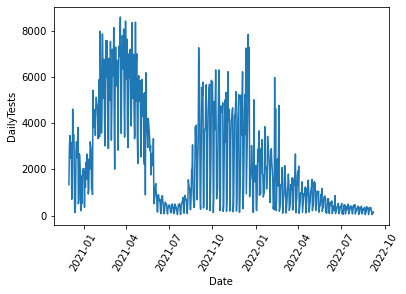

In [123]:
seaborn.lineplot(data=tompkins_covid_df, x='Date', y='DailyTests')
plt.xticks(rotation=60)
plt.show()

Returning data to local variable df2


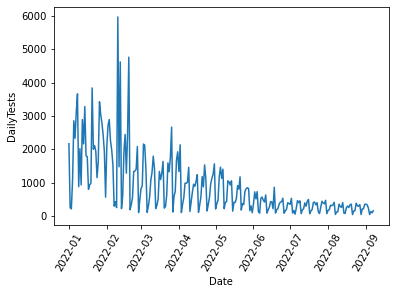

In [124]:
#Use SQL to create a new dataframe that contains only the data from 2022. Create the same subset in `pandas` 
#and verify that it has the same number of elements. Plot the daily number of tests for this subset.


%sql df2 << SELECT * FROM tompkins_covid_df WHERE Date > '2021-12-31'

%sql SELECT COUNT(Date) FROM df2 

df3 = tompkins_covid_df[tompkins_covid_df["Date"] > '2021-12-31']


seaborn.lineplot(data=df2, x='Date', y='DailyTests')
plt.xticks(rotation=60)
plt.show()

Returning data to local variable df4


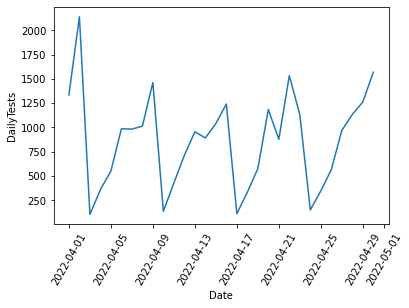

In [99]:
%sql df4 << SELECT * FROM tompkins_covid_df WHERE Date < '2022-05-01' AND Date > '2022-3-31'
seaborn.lineplot(data=df4, x='Date', y='DailyTests')
plt.xticks(rotation=60)
plt.show()


In the markdown cell, describe any patterns you observe. Comment on alternative visualizations that might make the pattern(s) you observe more visible.


I observed a cyclic nature of daily tests-- they rise and fall in a more or less consistent manner over time. A way to increase visibility would be maybe to show all dates on the X axis. 

**Describe what you notice about the number of tests recorded per day. Describe other visualizations that might make any patterns you notice easier to spot.**

---

## Problem 7 (20 pts)

Tompkins County started recording self-reported at-home tests in late 2021. Create a dataframe using SQL that contains only the rows where `PositiveSelf` is present. **Hint: handling missing values is sometimes inconsistent across systems, so we'll give you this one. Use `isnan(PositiveSelf) is not null`**

Do the same selection using `pandas`. Confirm that the number of rows is the same.

Use the `.cov()` and `.corr()` functions of a data frame to display the covariance and correlation of `DailyTests`, `PositivePCR`,  `PositiveSelf`, and `DayOfWeek`.

In separate plots, create a line plot showing the values for PCR positives and at-home positives.

We want you to be able to calculate values like correlation, but also think critically about data. In a markdown cell, describe why you think PCR and at-home tests would and would not be correlated.

---

Returning data to local variable df5
                 DailyTests   PositivePCR  PositiveSelf   DayOfWeek
DailyTests    917494.945374  29813.907459   5382.020782  229.217899
PositivePCR    29813.907459   3332.116671    562.668054   20.684825
PositiveSelf    5382.020782    562.668054    215.750189   -3.789883
DayOfWeek        229.217899     20.684825     -3.789883    4.031128
              DailyTests  PositivePCR  PositiveSelf  DayOfWeek
DailyTests      1.000000     0.539209      0.382532   0.119188
PositivePCR     0.539209     1.000000      0.663616   0.178475
PositiveSelf    0.382532     0.663616      1.000000  -0.128510
DayOfWeek       0.119188     0.178475     -0.128510   1.000000


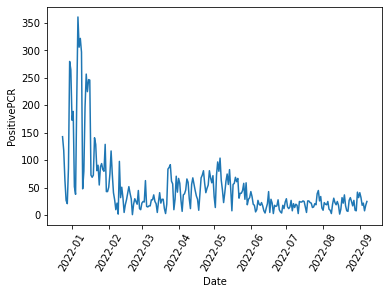

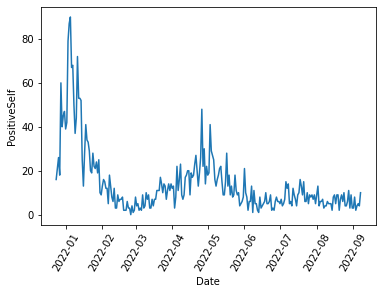

In [117]:
%sql df5 << SELECT * FROM tompkins_covid_df WHERE isnan(PositiveSelf) is not null

df6 = tompkins_covid_df[tompkins_covid_df["PositiveSelf"].isna() == False ]

print((df6[["DailyTests", "PositivePCR", "PositiveSelf", "DayOfWeek"]]).cov())

print((df6[["DailyTests", "PositivePCR", "PositiveSelf", "DayOfWeek"]]).corr()) 

seaborn.lineplot(data=df6, x='Date', y='PositivePCR')
plt.xticks(rotation=60)
plt.show()

seaborn.lineplot(data=df6, x='Date', y='PositiveSelf')
plt.xticks(rotation=60)
plt.show()

**Describe your observations about correlation between recorded PCR and at-home positive tests**

 In a markdown cell, describe why you think PCR and at-home tests would and would not be correlated.
 
 
PCR and at-home tests might be correlated because people who take PCR tests may be predisposed to taking an at home test as well, and also vice-versa because they might question the reliability of exclusively using one or the other. 

Conversely, they might not be correlated because people who take PCR tests would be predisposed to not take an at home test because they already took a PCR test (and don't need tot take a second test, and the inverse regarding self-testers may also be true) and also there might a confounding variable such as Covid infection rate overall that leads to similar spikes in the positive testing for PCR and Self-tests